## Gathering data from Api

In [1]:
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
response = requests.get('https://catalog.data.gov/api/3/action/package_show?id=traffic-crashes-crashes')

In [3]:
response_dict = json.loads(response.content)

In [4]:
assert response_dict['success'] is True

In [5]:
data = response_dict['result']

In [6]:
pprint.pprint(data)

{'author': None,
 'author_email': None,
 'creator_user_id': '2b785922-9f13-491b-a3c2-2a40acbd80c2',
 'extras': [{'key': 'resource-type', 'value': 'Dataset'},
            {'key': 'source_hash',
             'value': '6984bb9531cca4de49c4004e869463245bce9658844fee0ca843bdeaa48b0447'},
            {'key': 'source_datajson_identifier', 'value': True},
            {'key': 'source_schema_version', 'value': '1.1'},
            {'key': 'accessLevel', 'value': 'public'},
            {'key': 'identifier',
             'value': 'https://data.cityofchicago.org/api/views/85ca-t3if'},
            {'key': 'issued', 'value': '2023-07-27'},
            {'key': 'landingPage',
             'value': 'https://data.cityofchicago.org/d/85ca-t3if'},
            {'key': 'modified', 'value': '2024-02-29'},
            {'key': 'publisher', 'value': 'data.cityofchicago.org'},
            {'key': 'theme', 'value': ['Transportation']},
            {'key': 'catalog_@context',
             'value': 'https://project-o

In [7]:
data_url = data['resources'][0]['url']
data_format = data['resources'][0]['format']
print('Data format:  ' + data_format)
print(data_url)
csv = ['comma-separated-values', 'CSV', 'csv']

Data format:  CSV
https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD


In [8]:
df = pd.read_csv(data_url)

In [9]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [10]:
df

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0       23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1       2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3       7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
...                                                   ...              ...   
810960  ffffc802346fd6f48f99117898fbc558237a3052c327b8...              NaN   
810961  ffffd143cf6dc784876069140869d2d724080089450108...              NaN   
810962  ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c...              NaN   
810963  ffffe577251dc1cc67f2f823b595e5028427a210e2a40e...              NaN   
810964  6aba853bb6210cc5569d6b74e00f62215b7566d1726c3a...              NaN   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1       09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3       08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4       08/18/2023 12:50:00 PM                  15                  OTHER   
...                        ...                 ...                    ...   
810960  07/28/2020 07:30:00 AM                  30            NO CONTROLS   
810961  12/24/2022 07:10:00 PM                  30            NO CONTROLS   
810962  07/19/2018 03:40:00 PM                  30                UNKNOWN   
810963  02/20/2020 08:00:00 AM                  30         TRAFFIC SIGNAL   
810964  07/29/2023 05:33:00 PM                  10                UNKNOWN   

            DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR                    DUSK   
1                NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
2       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
3                NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
4       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
...                      ...               ...                     ...   
810960           NO CONTROLS             CLEAR                DAYLIGHT   
810961           NO CONTROLS              SNOW  DARKNESS, LIGHTED ROAD   
810962               UNKNOWN           UNKNOWN                 UNKNOWN   
810963  FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
810964               UNKNOWN             CLEAR                DAYLIGHT   

                FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0                          ANGLE              FIVE POINT, OR MORE  ...   
1                       REAR END       DIVIDED - W/MEDIAN BARRIER  ...   
2           PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
3       SIDESWIPE SAME DIRECTION                      NOT DIVIDED  ...   
4                       REAR END                            OTHER  ...   
...                          ...                              ...  ...   
810960                   HEAD ON                      NOT DIVIDED  ...   
810961  SIDESWIPE SAME DIRECTION  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
810962  SIDESWIPE SAME DIRECTION                      NOT DIVIDED  ...   
810963                   TURNING                      NOT DIVIDED  ...   
810964                  REAR END                   T-INTERSECTION  ...   

        INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                               2.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               1.0                      

## Data Cleaning

There are a lot of columns which we wont need in our process, so we will drop them.

In [11]:
df_new = df.drop(columns=['CRASH_DATE_EST_I','REPORT_TYPE','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DATE_POLICE_NOTIFIED', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','LATITUDE','LONGITUDE','LOCATION'])

In [12]:
df_new

CRASH_RECORD_ID  \
0       23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...   
1       2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...   
2       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
3       7ebf015016f83d09b321afd671a836d6b148330535d5df...   
4       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
...                                                   ...   
810960  ffffc802346fd6f48f99117898fbc558237a3052c327b8...   
810961  ffffd143cf6dc784876069140869d2d724080089450108...   
810962  ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c...   
810963  ffffe577251dc1cc67f2f823b595e5028427a210e2a40e...   
810964  6aba853bb6210cc5569d6b74e00f62215b7566d1726c3a...   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1       09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3       08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4       08/18/2023 12:50:00 PM                  15                  OTHER   
...                        ...                 ...                    ...   
810960  07/28/2020 07:30:00 AM                  30            NO CONTROLS   
810961  12/24/2022 07:10:00 PM                  30            NO CONTROLS   
810962  07/19/2018 03:40:00 PM                  30                UNKNOWN   
810963  02/20/2020 08:00:00 AM                  30         TRAFFIC SIGNAL   
810964  07/29/2023 05:33:00 PM                  10                UNKNOWN   

            DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR                    DUSK   
1                NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
2       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
3                NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
4       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
...                      ...               ...                     ...   
810960           NO CONTROLS             CLEAR                DAYLIGHT   
810961           NO CONTROLS              SNOW  DARKNESS, LIGHTED ROAD   
810962               UNKNOWN           UNKNOWN                 UNKNOWN   
810963  FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
810964               UNKNOWN             CLEAR                DAYLIGHT   

                FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  \
0                          ANGLE              FIVE POINT, OR MORE   
1                       REAR END       DIVIDED - W/MEDIAN BARRIER   
2           PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)   
3       SIDESWIPE SAME DIRECTION                      NOT DIVIDED   
4                       REAR END                            OTHER   
...                          ...                              ...   
810960                   HEAD ON                      NOT DIVIDED   
810961  SIDESWIPE SAME DIRECTION  DIVIDED - W/MEDIAN (NOT RAISED)   
810962  SIDESWIPE SAME DIRECTION                      NOT DIVIDED   
810963                   TURNING                      NOT DIVIDED   
810964                  REAR END                   T-INTERSECTION   

                 ALIGNMENT  ... INJURIES_TOTAL INJURIES_FATAL  \
0       STRAIGHT AND LEVEL  ...            3.0            0.0   
1       STRAIGHT AND LEVEL  ...            0.0            0.0   
2       STRAIGHT AND LEVEL  ...            0.0            0.0   
3       STRAIGHT AND LEVEL  ...            0.0            0.0   
4       STRAIGHT AND LEVEL  ...            1.0            0.0   
...                    ...  ...            ...            ...   
810960  STRAIGHT AND LEVEL  ...            1.0            0.0   
810961  STRAIGHT AND LEVEL  ...            0.0            0.0   
810962  STRAIGHT AND LEVEL  ...            0.0            0.0   
810963  STRAIGHT

Now we look for null values

In [13]:
df_new.isnull().sum()

CRASH_RECORD_ID                     0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
CRASH_TYPE                          0
DAMAGE                              0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    4
STREET_NAME                         1
NUM_UNITS                           0
MOST_SEVERE_INJURY               1781
INJURIES_TOTAL                   1769
INJURIES_FATAL                   1769
INJURIES_INCAPACITATING          1769
INJURIES_NON_INCAPACITATING      1769
INJURIES_REPORTED_NOT_EVIDENT    1769
INJURIES_NO_

In [14]:
df_new = df_new[~df_new['MOST_SEVERE_INJURY'].isnull()]
df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'])


C:\Users\shahj\AppData\Local\Temp\ipykernel_22300\740663586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'])


In [15]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 4
STREET_NAME                      1
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

In [16]:
 df_new['STREET_DIRECTION'].fillna('N',inplace= True)

C:\Users\shahj\AppData\Local\Temp\ipykernel_22300\2592392866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STREET_DIRECTION'].fillna('N',inplace= True)


In [17]:
 df_new['STREET_NAME'].fillna('UNKNOWN',inplace= True)

C:\Users\shahj\AppData\Local\Temp\ipykernel_22300\3482912273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STREET_NAME'].fillna('UNKNOWN',inplace= True)


In [18]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

## EDA

In [19]:
print(df_new.dtypes)

CRASH_RECORD_ID                          object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
CRASH_TYPE                               object
DAMAGE                                   object
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
NUM_UNITS                                 int64
MOST_SEVERE_INJURY                      

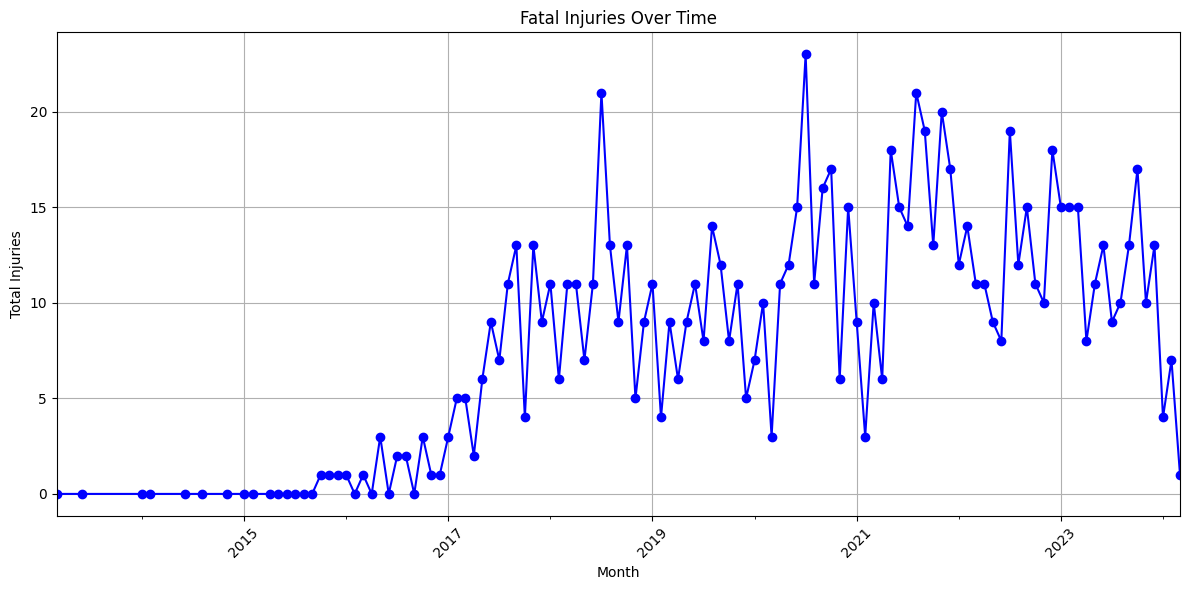

In [20]:
injuries_over_time = df_new.groupby(df_new['CRASH_DATE'].dt.to_period('M'))['INJURIES_FATAL'].sum()

plt.figure(figsize=(12, 6))
injuries_over_time.plot(marker='o', color='blue', linestyle='-')
plt.title('Fatal Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

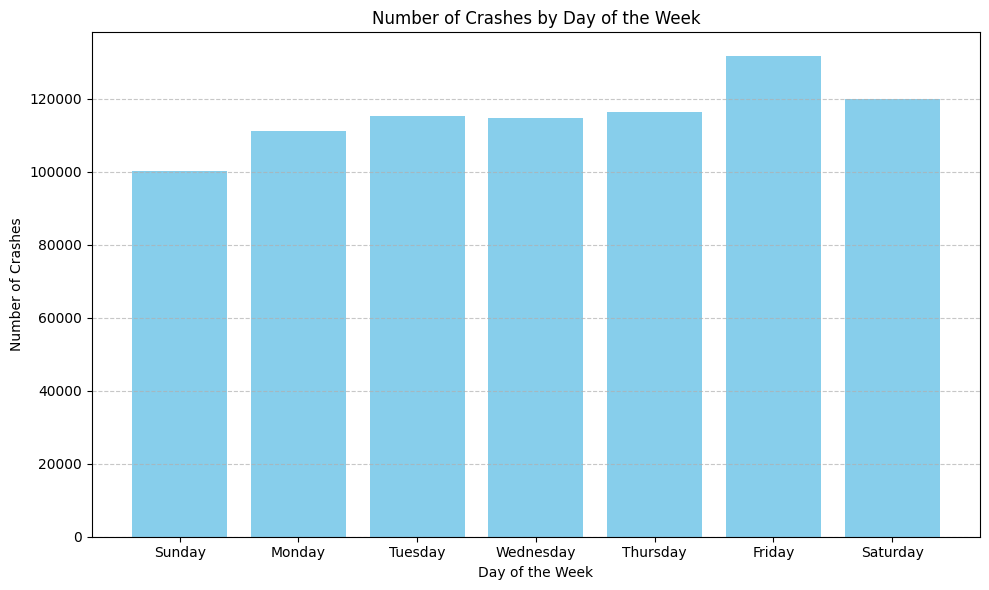

In [21]:
day_counts = df_new['CRASH_DAY_OF_WEEK'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of the Week')
plt.xticks(day_counts.index, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

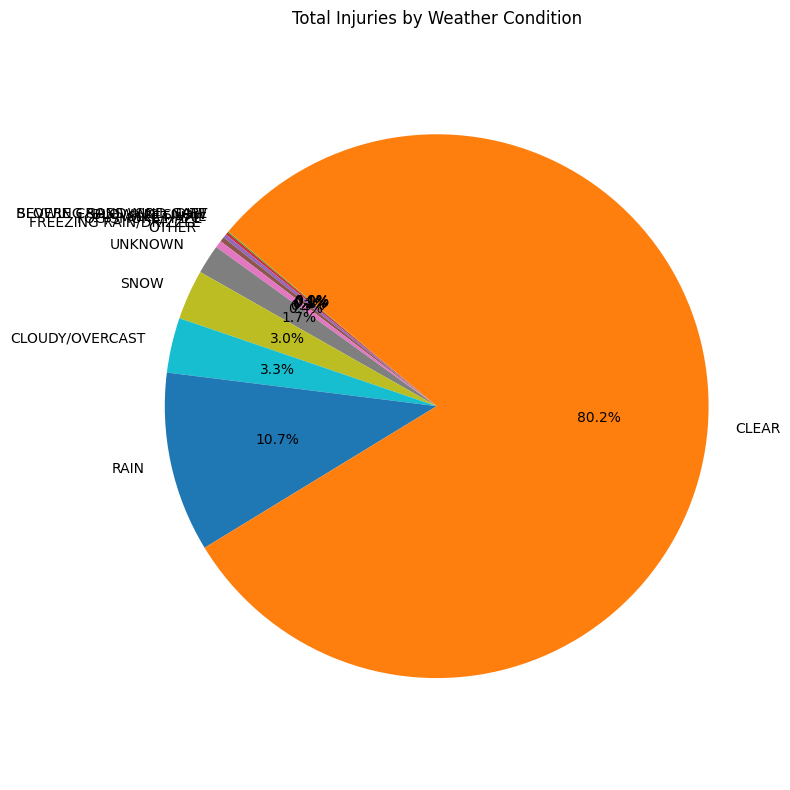

In [22]:

weather_injuries = df_new.groupby('WEATHER_CONDITION')['INJURIES_TOTAL'].sum().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(weather_injuries, labels=weather_injuries.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Injuries by Weather Condition')
plt.axis('equal') 
plt.tight_layout()
plt.show()

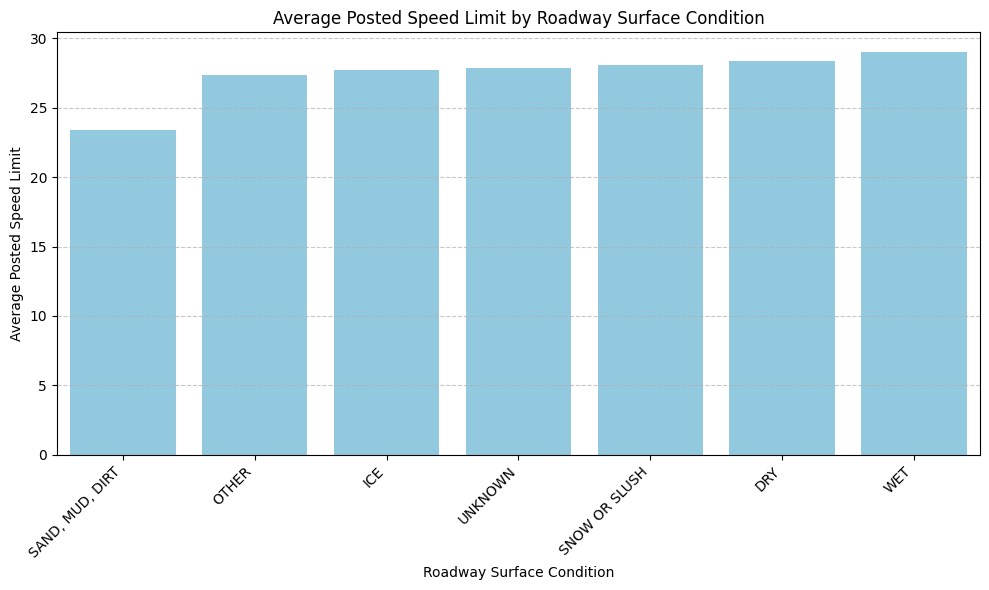

In [23]:
import seaborn as sns
roadway_speed_limit = df_new.groupby('ROADWAY_SURFACE_COND')['POSTED_SPEED_LIMIT'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=roadway_speed_limit.index, y=roadway_speed_limit.values, color='skyblue')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Average Posted Speed Limit')
plt.title('Average Posted Speed Limit by Roadway Surface Condition')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

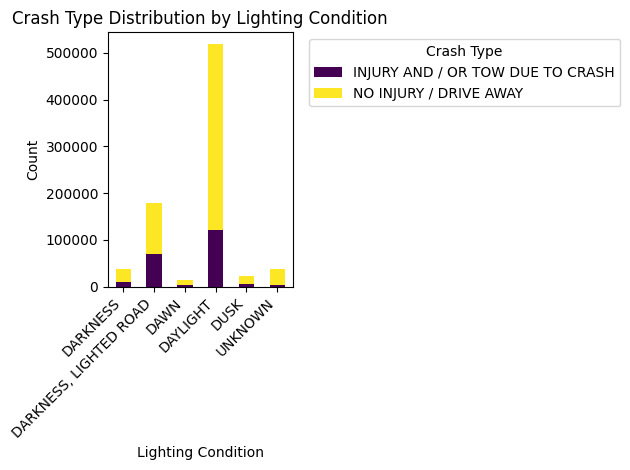

In [24]:
lighting_crash_type = df_new.groupby(['LIGHTING_CONDITION', 'CRASH_TYPE']).size().unstack()

plt.figure(figsize=(10, 6))
lighting_crash_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.title('Crash Type Distribution by Lighting Condition')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crash Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

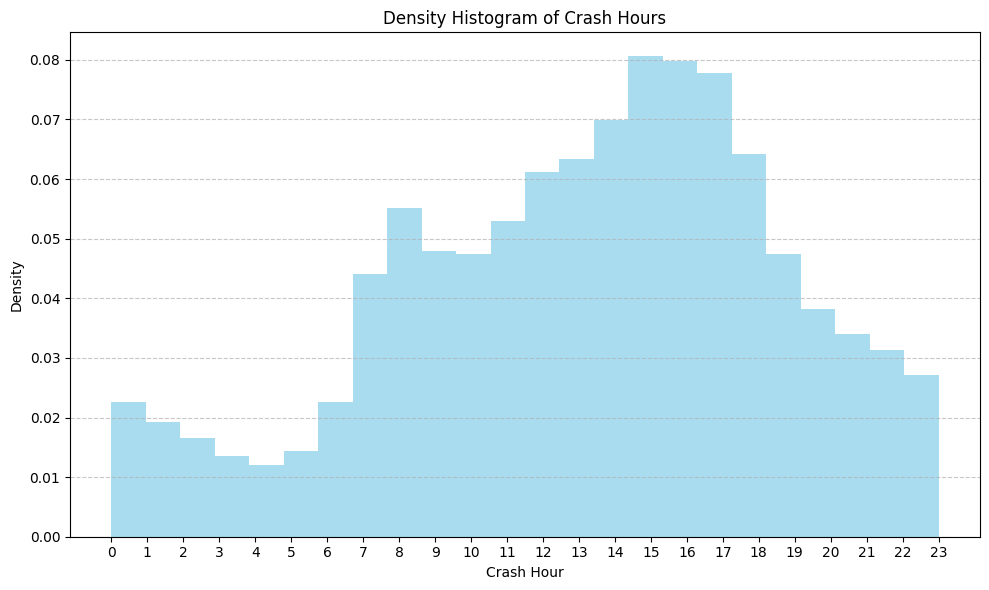

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['CRASH_HOUR'], bins=24, density=True, color='skyblue', alpha=0.7)
plt.xlabel('Crash Hour')
plt.ylabel('Density')
plt.title('Density Histogram of Crash Hours')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

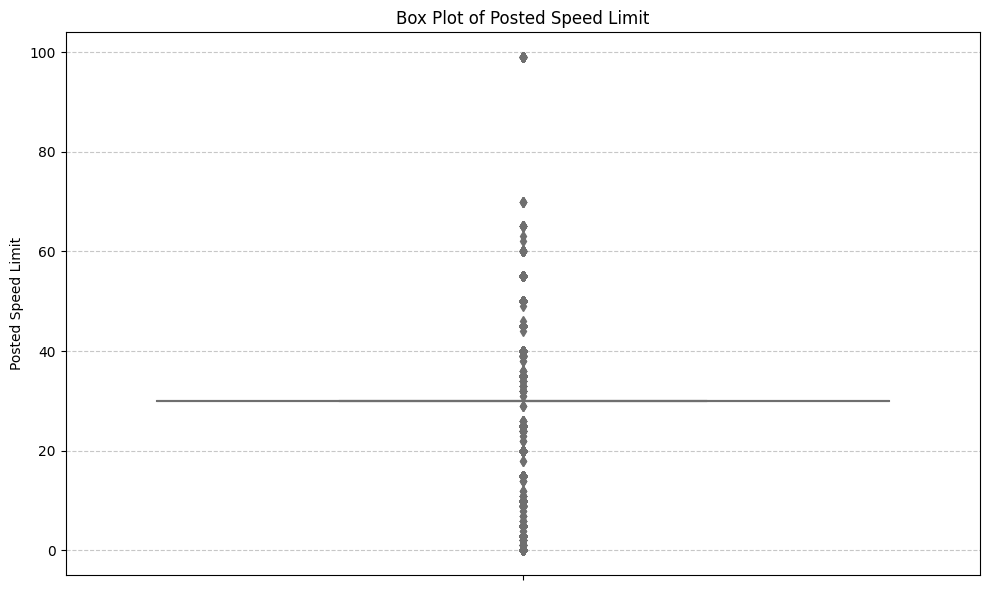

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, y='POSTED_SPEED_LIMIT', color='skyblue')
plt.ylabel('Posted Speed Limit')
plt.title('Box Plot of Posted Speed Limit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

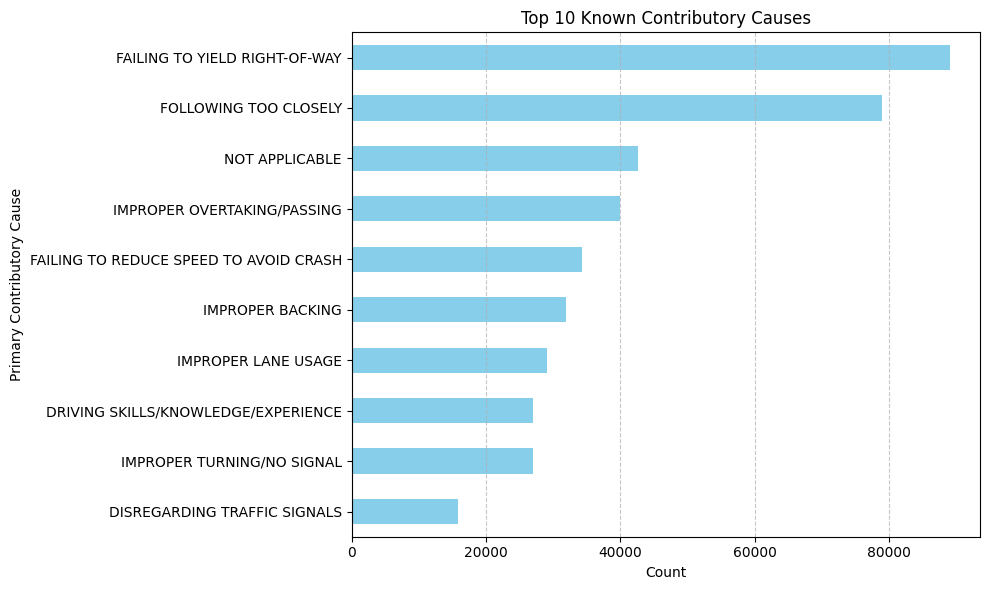

In [27]:
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(11)[1:]


plt.figure(figsize=(10, 6))
top_10_causes.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.title('Top 10 Known Contributory Causes')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

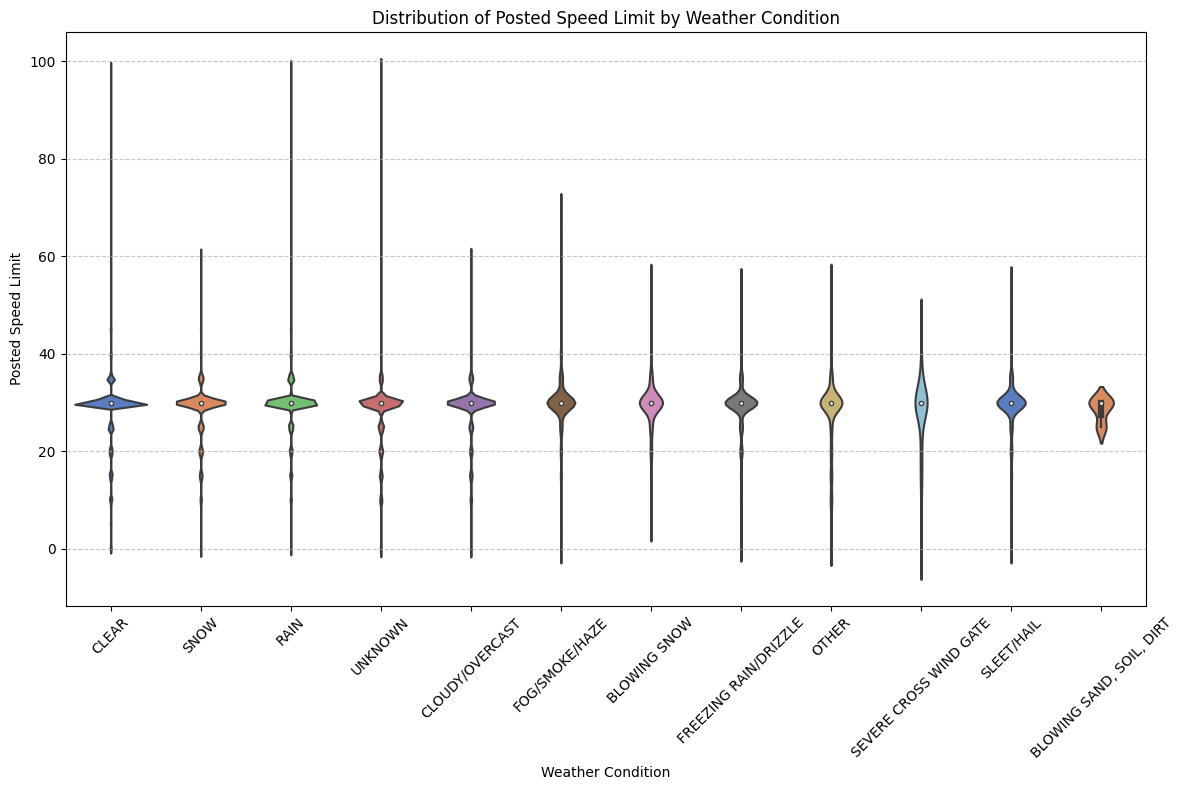

In [28]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_new, x='WEATHER_CONDITION', y='POSTED_SPEED_LIMIT', palette='muted')
plt.xlabel('Weather Condition')
plt.ylabel('Posted Speed Limit')
plt.title('Distribution of Posted Speed Limit by Weather Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

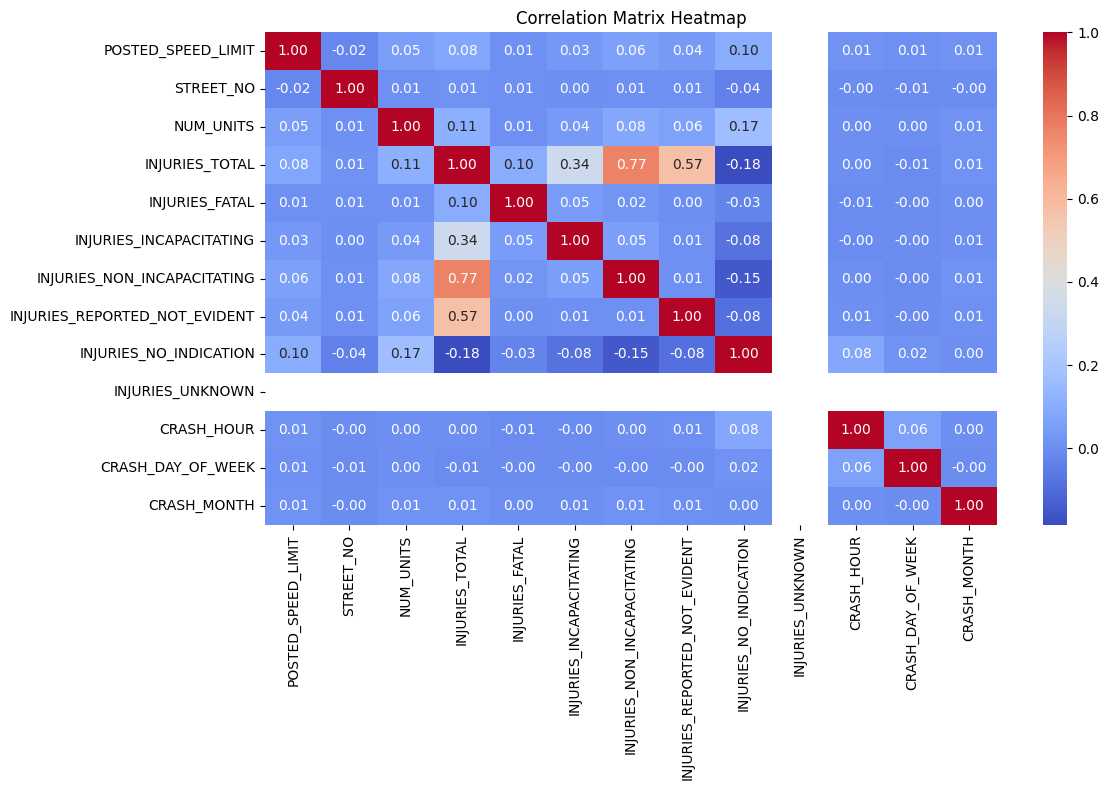

In [29]:
correlation_matrix = df_new.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## pca and clustering


In [30]:
df_new.dtypes

CRASH_RECORD_ID                          object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
CRASH_TYPE                               object
DAMAGE                                   object
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
NUM_UNITS                                 int64
MOST_SEVERE_INJURY                      

In [31]:
df_new

CRASH_RECORD_ID          CRASH_DATE  \
0       23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7... 2023-09-05 19:05:00   
1       2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f... 2023-09-22 18:45:00   
2       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
3       7ebf015016f83d09b321afd671a836d6b148330535d5df... 2023-08-09 23:00:00   
4       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 2023-08-18 12:50:00   
...                                                   ...                 ...   
810960  ffffc802346fd6f48f99117898fbc558237a3052c327b8... 2020-07-28 07:30:00   
810961  ffffd143cf6dc784876069140869d2d724080089450108... 2022-12-24 19:10:00   
810962  ffffe467b0d2d95c897e8c2721941f87dede1661a3b60c... 2018-07-19 15:40:00   
810963  ffffe577251dc1cc67f2f823b595e5028427a210e2a40e... 2020-02-20 08:00:00   
810964  6aba853bb6210cc5569d6b74e00f62215b7566d1726c3a... 2023-07-29 17:33:00   

        POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0                       30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
1                       50            NO CONTROLS           NO CONTROLS   
2                       30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
3                       30            NO CONTROLS           NO CONTROLS   
4                       15                  OTHER  FUNCTIONING PROPERLY   
...                    ...                    ...                   ...   
810960                  30            NO CONTROLS           NO CONTROLS   
810961                  30            NO CONTROLS           NO CONTROLS   
810962                  30                UNKNOWN               UNKNOWN   
810963                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
810964                  10                UNKNOWN               UNKNOWN   

       WEATHER_CONDITION      LIGHTING_CONDITION          FIRST_CRASH_TYPE  \
0                  CLEAR                    DUSK                     ANGLE   
1                  CLEAR  DARKNESS, LIGHTED ROAD                  REAR END   
2                  CLEAR                DAYLIGHT      PARKED MOTOR VEHICLE   
3                  CLEAR  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   
4                  CLEAR                DAYLIGHT                  REAR END   
...                  ...                     ...                       ...   
810960             CLEAR                DAYLIGHT                   HEAD ON   
810961              SNOW  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   
810962           UNKNOWN                 UNKNOWN  SIDESWIPE SAME DIRECTION   
810963             CLEAR                DAYLIGHT                   TURNING   
810964             CLEAR                DAYLIGHT                  REAR END   

                        TRAFFICWAY_TYPE           ALIGNMENT  ...  \
0                   FIVE POINT, OR MORE  STRAIGHT AND LEVEL  ...   
1            DIVIDED - W/MEDIAN BARRIER  STRAIGHT AND LEVEL  ...   
2       DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL  ...   
3                           NOT DIVIDED  STRAIGHT AND LEVEL  ...   
4                                 OTHER  STRAIGHT AND LEVEL  ...   
...                                 ...                 ...  ...   
810960                      NOT DIVIDED  STRAIGHT AND LEVEL  ...   
810961  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL  ...   
810962                      NOT DIVIDED  STRAIGHT AND LEVEL  ...   
810963                      NOT DIVIDED  STRAIGHT AND LEVEL  ...   
810964                   T-INTERSECTION  STRAIGHT AND LEVEL  ...   

       INJURIES_TOTAL INJURIES_FATAL INJURIES_INCAPACITATING  \
0                 3.0            0.0                     1.0   
1                 0.0            0.0                     0.0   
2                 0.0            0.0                     0.0   
3                 0.0            0.0                     0.0   
4                 1.0            0.0                     0.0   
...               ...         

In [32]:
numeric_df = df_new.select_dtypes(include=['int64','float64'])
numeric_df

POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
0                       30       5500          2             3.0   
1                       50       7900          2             0.0   
2                       30       2101          4             0.0   
3                       30      10020          2             0.0   
4                       15        700          2             1.0   
...                    ...        ...        ...             ...   
810960                  30        922          2             1.0   
810961                  30       4100          2             0.0   
810962                  30        400          2             0.0   
810963                  30       1600          2             0.0   
810964                  10       1124          2             0.0   

        INJURIES_FATAL  INJURIES_INCAPACITATING  INJURIES_NON_INCAPACITATING  \
0                  0.0                      1.0                          2.0   
1                  0.0                      0.0                          0.0   
2                  0.0                      0.0                          0.0   
3                  0.0                      0.0                          0.0   
4                  0.0                      0.0                          1.0   
...                ...                      ...                          ...   
810960             0.0                      0.0                          0.0   
810961             0.0                      0.0                          0.0   
810962             0.0                      0.0                          0.0   
810963             0.0                      0.0                          0.0   
810964             0.0                      0.0                          0.0   

        INJURIES_REPORTED_NOT_EVIDENT  INJURIES_NO_INDICATION  \
0                                 0.0                     2.0   
1                                 0.0                     2.0   
2                                 0.0                     1.0   
3                                 0.0                     2.0   
4                                 0.0                     1.0   
...                               ...                     ...   
810960                            1.0                     2.0   
810961                            0.0                     2.0   
810962                            0.0                     2.0   
810963                            0.0                     2.0   
810964                            0.0                     2.0   

        INJURIES_UNKNOWN  CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  
0                    0.0          19                  3            9  
1                    0.0          18                  6            9  
2                    0.0          14                  7            7  
3                    0.0          23                  4            8  
4                    0.0          12                  6            8  
...                  ...         ...                ...          ...  
810960               0.0           7                  3            7  
810961               0.0          19                  7           12  
810962               0.0          15                  5            7  
810963               0.0           8                  5            2  
810964               0.0          17                  7            7  

[809184 rows x 13 columns]

Normalizing the data

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)
df_scaled

np.random.seed(0)
# Filter rows where all values are not zero
cl = df_scaled.sample(n=2000,replace=True)
cl


POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
305711            0.303030   0.002219   0.117647        0.000000   
435829            0.303030   0.019288   0.058824        0.000000   
117952            0.303030   0.019065   0.058824        0.000000   
152315            0.151515   0.020907   0.058824        0.000000   
359783            0.303030   0.000222   0.058824        0.000000   
...                    ...        ...        ...             ...   
635772            0.353535   0.023398   0.058824        0.000000   
583170            0.303030   0.017080   0.058824        0.000000   
592293            0.101010   0.006777   0.058824        0.000000   
89031             0.353535   0.002749   0.176471        0.000000   
367703            0.303030   0.000002   0.058824        0.047619   

        INJURIES_FATAL  INJURIES_INCAPACITATING  INJURIES_NON_INCAPACITATING  \
305711             0.0                      0.0                     0.000000   
435829             0.0                      0.0                     0.000000   
117952             0.0                      0.0                     0.000000   
152315             0.0                      0.0                     0.000000   
359783             0.0                      0.0                     0.000000   
...                ...                      ...                          ...   
635772             0.0                      0.0                     0.000000   
583170             0.0                      0.0                     0.000000   
592293             0.0                      0.0                     0.000000   
89031              0.0                      0.0                     0.000000   
367703             0.0                      0.0                     0.047619   

        INJURIES_REPORTED_NOT_EVIDENT  INJURIES_NO_INDICATION  \
305711                            0.0                0.016393   
435829                            0.0                0.032787   
117952                            0.0                0.032787   
152315                            0.0                0.016393   
359783                            0.0                0.032787   
...                               ...                     ...   
635772                            0.0                0.032787   
583170                            0.0                0.032787   
592293                            0.0                0.032787   
89031                             0.0                0.016393   
367703                            0.0                0.032787   

        INJURIES_UNKNOWN  CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  
305711               0.0    0.000000           1.000000     1.000000  
435829               0.0    0.739130           0.333333     1.000000  
117952               0.0    0.565217           0.833333     0.454545  
152315               0.0    0.652174           0.333333     0.181818  
359783               0.0    0.043478           0.666667     0.818182  
...                  ...         ...                ...          ...  
635772               0.0    0.521739           1.000000     0.727273  
583170               0.0    0.608696           0.833333     0.818182  
592293               0.0    0.521739           0.333333     0.545455  
89031                0.0    1.000000           0.333333     0.545455  
367703               0.0    0.347826           0.833333     0.545455  

[2000 rows x 13 columns]

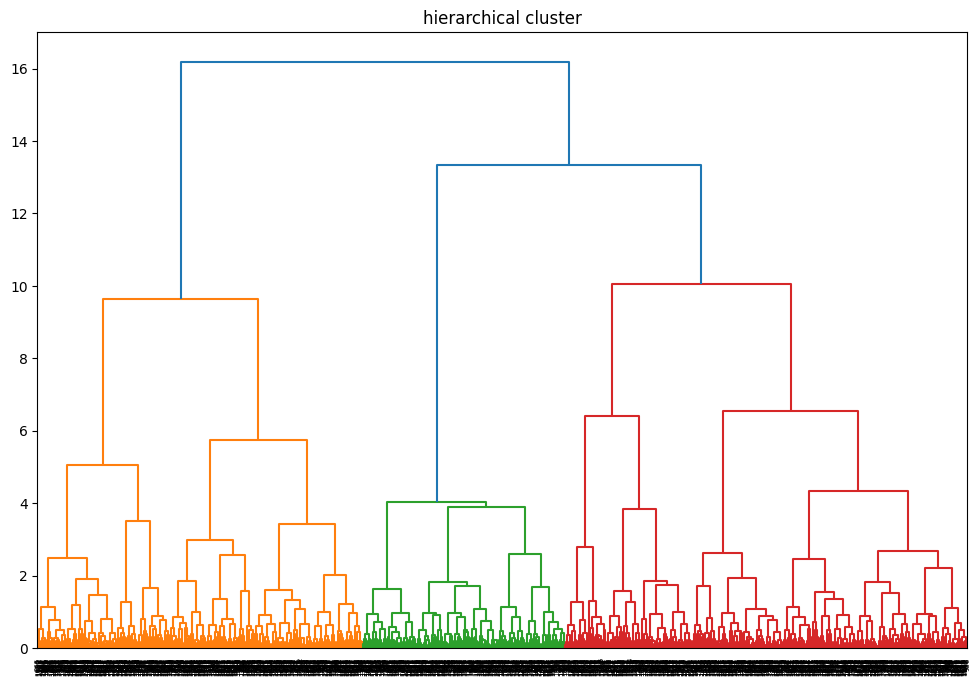

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage


plt.figure(figsize=(12,8))
plt.title('hierarchical cluster')
den = dendrogram(linkage(cl,method='ward'))
plt.show()

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

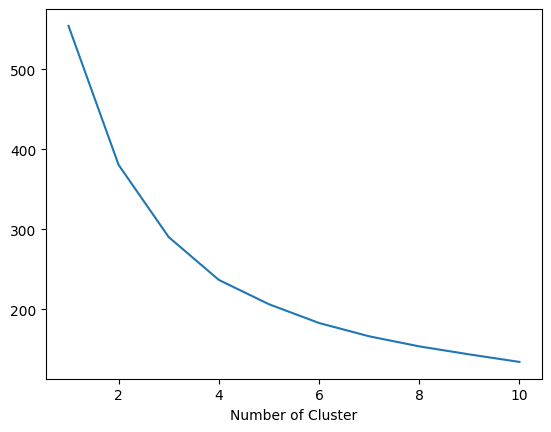

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.metrics import silhouette_score
wcss = [] 
for i in range(1,11):
    kmeans =  KMeans(n_clusters=i, init = 'k-means++', random_state=56)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of Cluster')
plt.show()

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

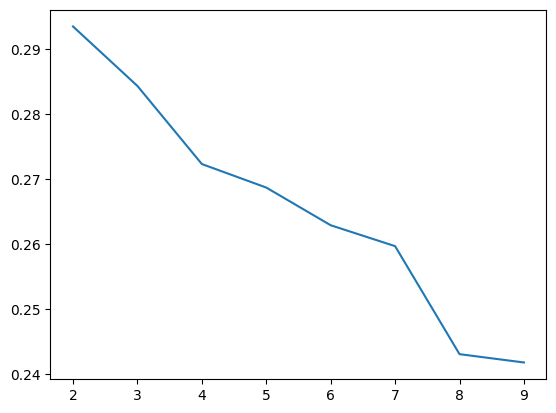

In [36]:
from sklearn.metrics import silhouette_score
j = []
for i in range (2,10): j.append(i)
savg = []
for i in range(2,10):
    kmeans =  KMeans(n_clusters=i)
    kmeans.fit(cl)
    clabels = kmeans.labels_
    savg.append(silhouette_score(cl,clabels))

plt.plot(j,savg)

In [37]:
from sklearn.cluster import KMeans
from scipy import stats

kmeans = KMeans(n_clusters=4, random_state=0, max_iter= 500).fit(cl[['POSTED_SPEED_LIMIT','STREET_NO']])
labels = kmeans.labels_
cl['clusters'] = labels

print(cl.groupby(['clusters']).mean())

          POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
clusters                                                             
0                   0.299014   0.008151   0.062249        0.009929   
1                   0.061953   0.008038   0.053333        0.004444   
2                   0.177415   0.009788   0.056561        0.003663   
3                   0.367043   0.008487   0.058824        0.017442   

          INJURIES_FATAL  INJURIES_INCAPACITATING  \
clusters                                            
0               0.000626                 0.002755   
1               0.000000                 0.000000   
2               0.000000                 0.001282   
3               0.000000                 0.002326   

          INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
clusters                                                               
0                            0.005397                       0.004341   
1                            0.002540       

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


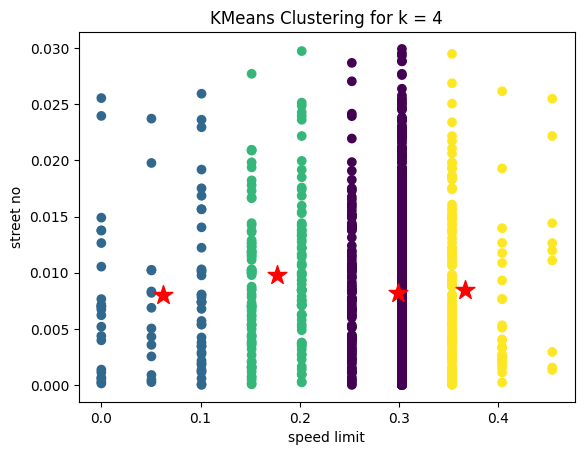

In [38]:
plt.scatter(cl['POSTED_SPEED_LIMIT'],cl['STREET_NO'], c = labels, cmap = 'viridis')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*', color = 'red', s =200)
plt.xlabel("speed limit")
plt.ylabel("street no")
plt.title("KMeans Clustering for k = 4")
plt.show()

In [39]:
from sklearn.cluster import KMeans
from scipy import stats

kmeans = KMeans(n_clusters=3, random_state=0, max_iter= 500).fit(cl[['POSTED_SPEED_LIMIT','STREET_NO']])
labels = kmeans.labels_
cl['clusters'] = labels

print(cl.groupby(['clusters']).mean())

          POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
clusters                                                             
0                   0.309736   0.008122   0.061869        0.010933   
1                   0.107031   0.008534   0.054149        0.003784   
2                   0.233006   0.009568   0.060813        0.005981   

          INJURIES_FATAL  INJURIES_INCAPACITATING  \
clusters                                            
0               0.000609                 0.002680   
1               0.000000                 0.000662   
2               0.000000                 0.002415   

          INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
clusters                                                               
0                            0.005771                       0.005278   
1                            0.001577                       0.002649   
2                            0.002761                       0.002899   

          INJURIES_NO_

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


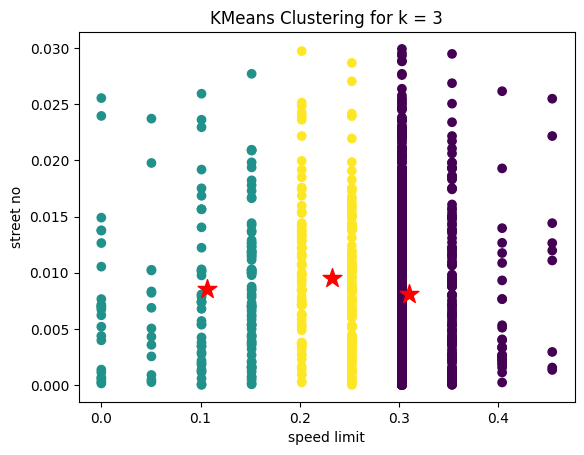

In [40]:
plt.scatter(cl['POSTED_SPEED_LIMIT'],cl['STREET_NO'], c = labels, cmap = 'viridis')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*', color = 'red', s =200)
plt.xlabel("speed limit")
plt.ylabel("street no")
plt.title("KMeans Clustering for k = 3")
plt.show()

In [41]:
from sklearn.cluster import KMeans
from scipy import stats

kmeans = KMeans(n_clusters=5, random_state=0, max_iter= 500).fit(cl[['POSTED_SPEED_LIMIT','STREET_NO']])
labels = kmeans.labels_
cl['clusters'] = labels

print(cl.groupby(['clusters']).mean())

          POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
clusters                                                             
0                   0.134387   0.008781   0.054220        0.002484   
1                   0.303030   0.008080   0.062225        0.010172   
2                   0.367043   0.008487   0.058824        0.017442   
3                   0.019641   0.007743   0.053922        0.007937   
4                   0.233006   0.009568   0.060813        0.005981   

          INJURIES_FATAL  INJURIES_INCAPACITATING  \
clusters                                            
0                0.00000                 0.000870   
1                0.00068                 0.002721   
2                0.00000                 0.002326   
3                0.00000                 0.000000   
4                0.00000                 0.002415   

          INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
clusters                                                         

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


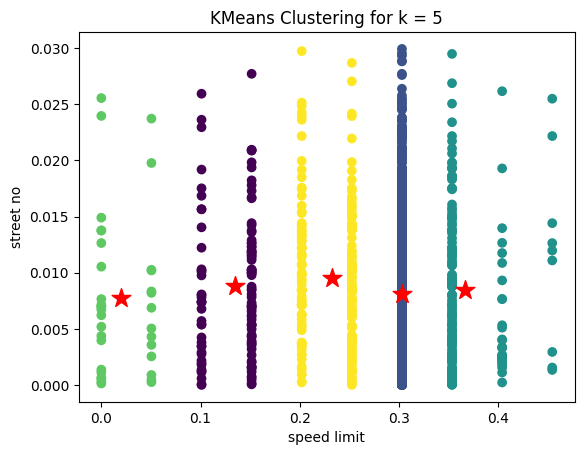

In [42]:
plt.scatter(cl['POSTED_SPEED_LIMIT'],cl['STREET_NO'], c = labels, cmap = 'viridis')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = '*', color = 'red', s =200)
plt.xlabel("speed limit")
plt.ylabel("street no")
plt.title("KMeans Clustering for k = 5")
plt.show()

In [43]:
cl

POSTED_SPEED_LIMIT  STREET_NO  NUM_UNITS  INJURIES_TOTAL  \
305711            0.303030   0.002219   0.117647        0.000000   
435829            0.303030   0.019288   0.058824        0.000000   
117952            0.303030   0.019065   0.058824        0.000000   
152315            0.151515   0.020907   0.058824        0.000000   
359783            0.303030   0.000222   0.058824        0.000000   
...                    ...        ...        ...             ...   
635772            0.353535   0.023398   0.058824        0.000000   
583170            0.303030   0.017080   0.058824        0.000000   
592293            0.101010   0.006777   0.058824        0.000000   
89031             0.353535   0.002749   0.176471        0.000000   
367703            0.303030   0.000002   0.058824        0.047619   

        INJURIES_FATAL  INJURIES_INCAPACITATING  INJURIES_NON_INCAPACITATING  \
305711             0.0                      0.0                     0.000000   
435829             0.0                      0.0                     0.000000   
117952             0.0                      0.0                     0.000000   
152315             0.0                      0.0                     0.000000   
359783             0.0                      0.0                     0.000000   
...                ...                      ...                          ...   
635772             0.0                      0.0                     0.000000   
583170             0.0                      0.0                     0.000000   
592293             0.0                      0.0                     0.000000   
89031              0.0                      0.0                     0.000000   
367703             0.0                      0.0                     0.047619   

        INJURIES_REPORTED_NOT_EVIDENT  INJURIES_NO_INDICATION  \
305711                            0.0                0.016393   
435829                            0.0                0.032787   
117952                            0.0                0.032787   
152315                            0.0                0.016393   
359783                            0.0                0.032787   
...                               ...                     ...   
635772                            0.0                0.032787   
583170                            0.0                0.032787   
592293                            0.0                0.032787   
89031                             0.0                0.016393   
367703                            0.0                0.032787   

        INJURIES_UNKNOWN  CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  clusters  
305711               0.0    0.000000           1.000000     1.000000         1  
435829               0.0    0.739130           0.333333     1.000000         1  
117952               0.0    0.565217           0.833333     0.454545         1  
152315               0.0    0.652174           0.333333     0.181818         0  
359783               0.0    0.043478           0.666667     0.818182         1  
...                  ...         ...                ...          ...       ...  
635772               0.0    0.521739           1.000000     0.727273         2  
583170               0.0    0.608696           0.833333     0.818182         1  
592293               0.0    0.521739           0.333333     0.545455         0  
89031                0.0    1.000000           0.333333     0.545455         2  
367703               0.0    0.347826           0.833333     0.545455         1  

[2000 rows x 14 columns]

In [44]:
injry = cl[['INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION']]
injry

INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
305711        0.000000             0.0                      0.0   
435829        0.000000             0.0                      0.0   
117952        0.000000             0.0                      0.0   
152315        0.000000             0.0                      0.0   
359783        0.000000             0.0                      0.0   
...                ...             ...                      ...   
635772        0.000000             0.0                      0.0   
583170        0.000000             0.0                      0.0   
592293        0.000000             0.0                      0.0   
89031         0.000000             0.0                      0.0   
367703        0.047619             0.0                      0.0   

        INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
305711                     0.000000                            0.0   
435829                     0.000000                            0.0   
117952                     0.000000                            0.0   
152315                     0.000000                            0.0   
359783                     0.000000                            0.0   
...                             ...                            ...   
635772                     0.000000                            0.0   
583170                     0.000000                            0.0   
592293                     0.000000                            0.0   
89031                      0.000000                            0.0   
367703                     0.047619                            0.0   

        INJURIES_NO_INDICATION  
305711                0.016393  
435829                0.032787  
117952                0.032787  
152315                0.016393  
359783                0.032787  
...                        ...  
635772                0.032787  
583170                0.032787  
592293                0.032787  
89031                 0.016393  
367703                0.032787  

[2000 rows x 6 columns]

In [45]:
pca = PCA()
xpca = pca.fit_transform(injry)
colnames = [f"PC{i+1}" for i in range(xpca.shape[1])]
xpca = pd.DataFrame(xpca, columns = colnames)
xpca.head()

PC1       PC2       PC3       PC4       PC5           PC6
0 -0.010183 -0.000049  0.007484 -0.015594 -0.000168  5.448698e-15
1 -0.012012  0.002874  0.000298 -0.001269 -0.000262 -1.387177e-16
2 -0.012012  0.002874  0.000298 -0.001269 -0.000262 -1.234908e-15
3 -0.010183 -0.000049  0.007484 -0.015594 -0.000168  5.543435e-15
4 -0.012012  0.002874  0.000298 -0.001269 -0.000262  9.029796e-19

array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

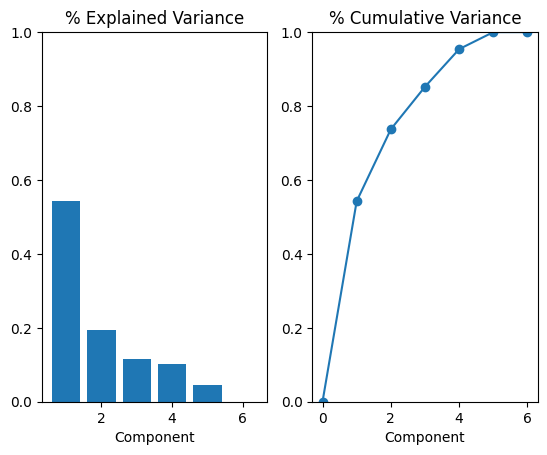

In [46]:
fig, ax = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
ax[0].bar(grid, evr)
ax[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

cv = np.cumsum(evr)
ax[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
ax[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

ax

In [47]:
import plotly.express as px
plotdf = pd.DataFrame()
plotdf =  xpca[['PC1','PC2']]
fig = px.scatter(plotdf)
fig.show()